In [2]:
import constants as c
import tester as t

b_results = t.run(c.BB, c.ZKC_FILE_PREFIX, 22)
d_results = t.run(c.DYNAMIC, c.ZKC_FILE_PREFIX, 22)
g_results = t.run(c.GREEDY, c.ZKC_FILE_PREFIX)
r_results = t.run(c.REDUX, c.ZKC_FILE_PREFIX)

[N=4] TIME: 15.61160 ms, AVG_TIME: 0.03122 ms, MAX_TIME: 0.09120 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=10] TIME: 247.38000 ms, AVG_TIME: 0.49476 ms, MAX_TIME: 1.93580 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=15] TIME: 4911.65640 ms, AVG_TIME: 9.82331 ms, MAX_TIME: 28.11210 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=20] TIME: 111172.65650 ms, AVG_TIME: 222.34531 ms, MAX_TIME: 530.68280 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=22] TIME: 268642.50560 ms, AVG_TIME: 537.28501 ms, MAX_TIME: 1310.73420 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=4] TIME: 77.61490 ms, AVG_TIME: 0.15523 ms, MAX_TIME: 0.48710 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=10] TIME: 591.20360 ms, AVG_TIME: 1.18241 ms, MAX_TIME: 2.50490 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=15] TIME: 2547.62910 ms, AVG_TIME: 5.09526 ms, MAX_TIME: 9.93940 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_E

In [3]:
b_avg_t, d_avg_t, g_avg_t, r_avg_t = [], [], [], []

for b_result in b_results:
  b_avg_t.append(float(b_result[2]))

for d_result in d_results:
  d_avg_t.append(float(d_result[2]))

for g_result in g_results:
  g_avg_t.append(float(g_result[2]))

for r_result in r_results:
  r_avg_t.append(float(r_result[2]))

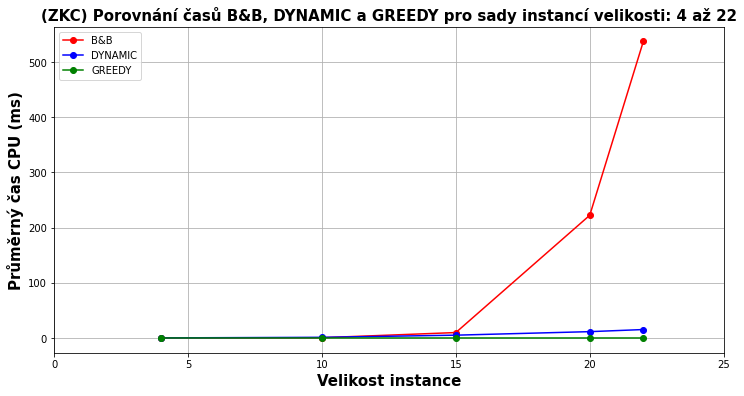

In [12]:
import numpy as np
import matplotlib.pyplot as plt

limit = 5
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, c.NUM_OF_THINGS[limit])

plt.title("(ZKC) Porovnání časů B&B, DYNAMIC a GREEDY pro sady instancí velikosti: 4 až 22", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrný čas CPU (ms)", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS[0:limit], b_avg_t[0:limit], marker = "o", linestyle = "solid", color = "red", label = "B&B")
plt.plot(c.NUM_OF_THINGS[0:limit], d_avg_t[0:limit], marker = "o", linestyle = "solid", color = "blue", label = "DYNAMIC")
plt.plot(c.NUM_OF_THINGS[0:limit], g_avg_t[0:limit], marker = "o", linestyle = "solid", color = "green", label = "GREEDY")

plt.grid()
plt.legend()
plt.show()

In [6]:
import pandas as pd

df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS[0:limit],
  "Průměrný čas CPU pro B&B (ms)": b_avg_t[0:limit],
  "Průměrný čas CPU pro DYNAMIC (ms)": d_avg_t[0:limit],
  "Průměrný čas CPU pro GREEDY (ms)": g_avg_t[0:limit]
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrný čas CPU pro B&B (ms),Průměrný čas CPU pro DYNAMIC (ms),Průměrný čas CPU pro GREEDY (ms)
4,0.031220,0.155230,0.006550
10,0.494760,1.182410,0.007540
15,9.823310,5.095260,0.009150
20,222.345310,11.460880,0.013130
22,537.285010,15.284200,0.013280


In [7]:
g_avg_e, r_avg_e, g_max_e, r_max_e = [], [], [], []

for g_result in g_results:
  g_avg_e.append(float(g_result[5]))
  g_max_e.append(float(g_result[6]))

for r_result in r_results:
  r_avg_e.append(float(r_result[5]))
  r_max_e.append(float(r_result[6]))

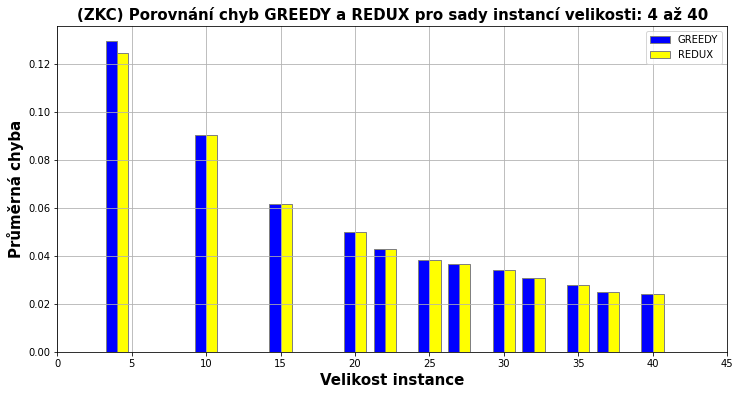

In [9]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

barWidth = 0.75
x1 = [x - barWidth / 2 for x in c.NUM_OF_THINGS]
x2 = [x + barWidth for x in x1]

plt.title("(ZKC) Porovnání chyb GREEDY a REDUX pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrná chyba", fontweight = "bold", fontsize = 15)

plt.bar(x1, g_avg_e, width = barWidth, color = "blue", edgecolor = "grey", label = "GREEDY")
plt.bar(x2, r_avg_e, width = barWidth, color = "yellow", edgecolor = "grey", label = "REDUX")

plt.grid()
plt.legend()
plt.show()

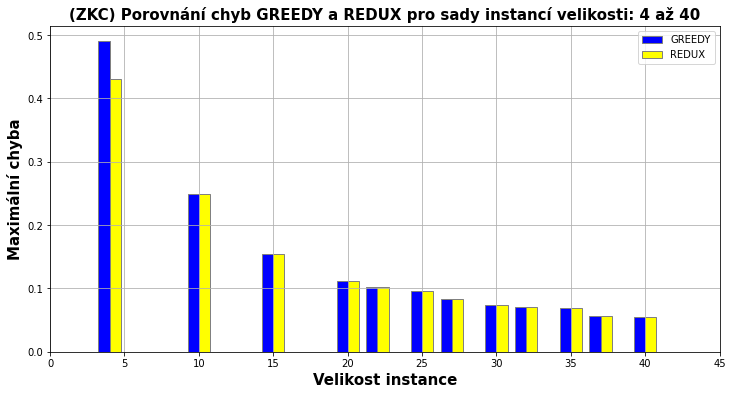

In [10]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

barWidth = 0.75
x1 = [x - barWidth / 2 for x in c.NUM_OF_THINGS]
x2 = [x + barWidth for x in x1]

plt.title("(ZKC) Porovnání chyb GREEDY a REDUX pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Maximální chyba", fontweight = "bold", fontsize = 15)

plt.bar(x1, g_max_e, width = barWidth, color = "blue", edgecolor = "grey", label = "GREEDY")
plt.bar(x2, r_max_e, width = barWidth, color = "yellow", edgecolor = "grey", label = "REDUX")

plt.grid()
plt.legend()
plt.show()

In [11]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS,
  "Průměrná chyba pro GREEDY": g_avg_e,
  "Průměrná chyba pro REDUX": r_avg_e,
  "Maximální chyba pro GREEDY": g_max_e,
  "Maximální chyba pro REDUX": r_max_e
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrná chyba pro GREEDY,Průměrná chyba pro REDUX,Maximální chyba pro GREEDY,Maximální chyba pro REDUX
4,0.129400,0.124300,0.490300,0.430880
10,0.090230,0.090230,0.249580,0.249580
15,0.061400,0.061400,0.154860,0.154860
20,0.049910,0.049910,0.111740,0.111740
22,0.042670,0.042670,0.102320,0.102320
25,0.038220,0.038220,0.095890,0.095890
27,0.036650,0.036650,0.082690,0.082690
30,0.034100,0.034100,0.073200,0.073200
32,0.030640,0.030640,0.070930,0.070930
35,0.027880,0.027880,0.069770,0.069770


In [13]:
f1_results = t.run(c.FPTAS, c.ZKC_FILE_PREFIX, 22, 0.1)
f5_results = t.run(c.FPTAS, c.ZKC_FILE_PREFIX, 22, 0.5)
f9_results = t.run(c.FPTAS, c.ZKC_FILE_PREFIX, 22, 0.9)

[N=4] TIME: 191.54780 ms, AVG_TIME: 0.38310 ms, MAX_TIME: 1.26480 ms, ERRORS: 45/500, AVG_ERROR: 0.00067, MAX_ERROR: 0.01708
[N=10] TIME: 2230.97910 ms, AVG_TIME: 4.46196 ms, MAX_TIME: 16.77760 ms, ERRORS: 113/500, AVG_ERROR: 0.00027, MAX_ERROR: 0.00433
[N=15] TIME: 7326.11930 ms, AVG_TIME: 14.65224 ms, MAX_TIME: 37.48370 ms, ERRORS: 162/500, AVG_ERROR: 0.00020, MAX_ERROR: 0.00180
[N=20] TIME: 16810.84000 ms, AVG_TIME: 33.62168 ms, MAX_TIME: 87.46120 ms, ERRORS: 208/500, AVG_ERROR: 0.00016, MAX_ERROR: 0.00121
[N=22] TIME: 23331.16450 ms, AVG_TIME: 46.66233 ms, MAX_TIME: 96.66100 ms, ERRORS: 208/500, AVG_ERROR: 0.00014, MAX_ERROR: 0.00116
[N=4] TIME: 44.02030 ms, AVG_TIME: 0.08804 ms, MAX_TIME: 0.45880 ms, ERRORS: 150/500, AVG_ERROR: 0.01647, MAX_ERROR: 0.20772
[N=10] TIME: 435.51260 ms, AVG_TIME: 0.87103 ms, MAX_TIME: 2.63170 ms, ERRORS: 314/500, AVG_ERROR: 0.00386, MAX_ERROR: 0.02530
[N=15] TIME: 1296.11000 ms, AVG_TIME: 2.59222 ms, MAX_TIME: 4.86190 ms, ERRORS: 341/500, AVG_ERROR: 0.

In [14]:
f1_avg_t, f1_max_e, f5_avg_t, f5_max_e, f9_avg_t, f9_max_e = [], [], [], [], [], []

for f1_result in f1_results:
  f1_avg_t.append(float(f1_result[2]))
  f1_max_e.append(float(f1_result[6]))

for f5_result in f5_results:
  f5_avg_t.append(float(f5_result[2]))
  f5_max_e.append(float(f5_result[6]))

for f9_result in f9_results:
  f9_avg_t.append(float(f9_result[2]))
  f9_max_e.append(float(f9_result[6]))

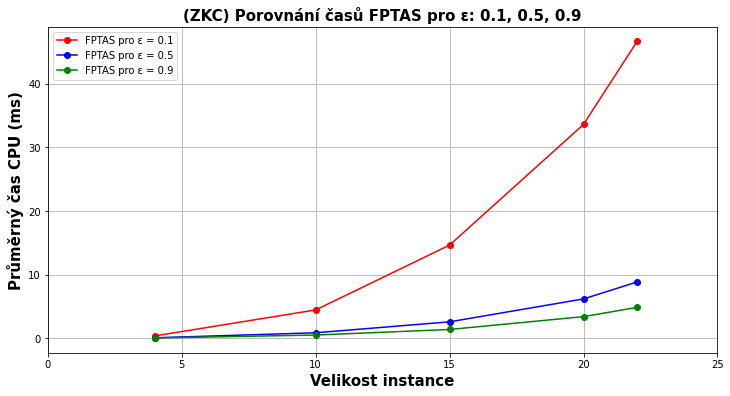

In [15]:
limit = 5
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, c.NUM_OF_THINGS[limit])

plt.title("(ZKC) Porovnání časů FPTAS pro ε: 0.1, 0.5, 0.9", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrný čas CPU (ms)", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS[0:limit], f1_avg_t[0:limit], marker = "o", linestyle = "solid", color = "red", label = "FPTAS pro ε = 0.1")
plt.plot(c.NUM_OF_THINGS[0:limit], f5_avg_t[0:limit], marker = "o", linestyle = "solid", color = "blue", label = "FPTAS pro ε = 0.5")
plt.plot(c.NUM_OF_THINGS[0:limit], f9_avg_t[0:limit], marker = "o", linestyle = "solid", color = "green", label = "FPTAS pro ε = 0.9")

plt.grid()
plt.legend()
plt.show()

In [16]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS[0:limit],
  "Průměrný čas CPU pro FPTAS s ε = 0.1 (ms)": f1_avg_t[0:limit],
  "Průměrný čas CPU pro FPTAS s ε = 0.5 (ms)": f5_avg_t[0:limit],
  "Průměrný čas CPU pro FPTAS s ε = 0.9 (ms)": f9_avg_t[0:limit]
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrný čas CPU pro FPTAS s ε = 0.1 (ms),Průměrný čas CPU pro FPTAS s ε = 0.5 (ms),Průměrný čas CPU pro FPTAS s ε = 0.9 (ms)
4,0.383100,0.088040,0.054620
10,4.461960,0.871030,0.515080
15,14.652240,2.592220,1.392540
20,33.621680,6.191980,3.408470
22,46.662330,8.856910,4.860050


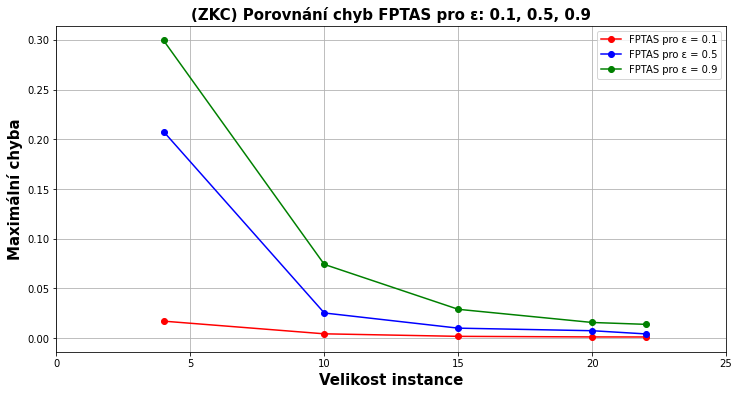

In [17]:
limit = 5
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, c.NUM_OF_THINGS[limit])

plt.title("(ZKC) Porovnání chyb FPTAS pro ε: 0.1, 0.5, 0.9", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Maximální chyba", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS[0:limit], f1_max_e[0:limit], marker = "o", linestyle = "solid", color = "red", label = "FPTAS pro ε = 0.1")
plt.plot(c.NUM_OF_THINGS[0:limit], f5_max_e[0:limit], marker = "o", linestyle = "solid", color = "blue", label = "FPTAS pro ε = 0.5")
plt.plot(c.NUM_OF_THINGS[0:limit], f9_max_e[0:limit], marker = "o", linestyle = "solid", color = "green", label = "FPTAS pro ε = 0.9")

plt.grid()
plt.legend()
plt.show()

In [18]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS[0:limit],
  "Maximální chyba pro FPTAS s ε = 0.1": f1_max_e[0:limit],
  "Maximální chyba pro FPTAS s ε = 0.5": f5_max_e[0:limit],
  "Maximální chyba pro FPTAS s ε = 0.9": f9_max_e[0:limit]
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Maximální chyba pro FPTAS s ε = 0.1,Maximální chyba pro FPTAS s ε = 0.5,Maximální chyba pro FPTAS s ε = 0.9
4,0.017080,0.207720,0.299330
10,0.004330,0.025300,0.074150
15,0.001800,0.010030,0.028990
20,0.001210,0.007450,0.015750
22,0.001160,0.004240,0.013860
